# Análisis del riesgo de incumplimiento de los prestatarios


## 1 Abre el archivo de datos y mira la información general. 

In [1]:
# Cargar todas las librerías
import pandas as pd
import matplotlib.pyplot as plt

try:
    df = pd.read_csv('credit_scoring_eng.csv')
except: 
    df = pd.read_csv('/datasets/credit_scoring_eng.csv')

## 2 Ejercicio 1. Exploración de datos



In [2]:
# Vamos a ver cuántas filas y columnas tiene nuestro conjunto de datos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB
None


In [3]:
# vamos a mostrar las primeras filas N
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


In [4]:
#los datos de la columna de days_employed, hay valores negativos y en la columna de education hay nombres con mayusculas y otros con minusculas

In [5]:
# Obtener información sobre los datos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB
None


`en la columna days_employed y total_income, hay valores ausentes`

In [6]:
# Veamos la tabla filtrada con valores ausentes de la primera columna donde faltan datos
df.loc[(df['days_employed'].isna())&(df['total_income'].isna())]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


`los valores ausentes pueden ser simetricos ya que en el dataFrame sin valores ausentes es muy parecido al DataFrame con valores ausentes`

In [7]:
# Apliquemos múltiples condiciones para filtrar datos y veamos el número de filas en la tabla filtrada.
#el porcentaje de valores ausentes es 
val_aus = df.groupby('days_employed').size().count()
val_total = len(df.index)
porcent = (val_aus / val_total) * 100
print(porcent)
porcent_table = (df.isna().sum()/len(df) )*100
porcent_table

89.90011614401858


children             0.000000
days_employed       10.099884
dob_years            0.000000
education            0.000000
education_id         0.000000
family_status        0.000000
family_status_id     0.000000
gender               0.000000
income_type          0.000000
debt                 0.000000
total_income        10.099884
purpose              0.000000
dtype: float64

`El porcentaje de valores ausentes es de casi el 12% del DataFrame, veamos si los valores ausentes dependiendo la columna`

In [8]:
# Vamos a investigar a los clientes que no tienen datos sobre la característica identificada y la columna con los valores ausentes

df_without_nan = df.dropna() #aplicamos .dropna() para eliminar los valores ausentes

for column in df_without_nan:
    print(df_without_nan[column].value_counts(normalize = True)) #Pasamos el bucle for para cada columna sin valores ausentes

for column in df:
    print(df[column].value_counts(normalize = True)) #Pasamos el bucle for para cada columna con valores ausentes

 0     0.656814
 1     0.224433
 2     0.095654
 3     0.015193
 20    0.003462
-1     0.002274
 4     0.001757
 5     0.000413
Name: children, dtype: float64
-8437.673028      0.000052
-3507.818775      0.000052
 354500.415854    0.000052
-769.717438       0.000052
-3963.590317      0.000052
                    ...   
-1099.957609      0.000052
-209.984794       0.000052
 398099.392433    0.000052
-1271.038880      0.000052
-1984.507589      0.000052
Name: days_employed, Length: 19351, dtype: float64
35    0.028577
41    0.028319
38    0.028112
40    0.028061
34    0.027595
42    0.027492
33    0.027389
39    0.026975
44    0.025993
29    0.025580
31    0.025580
48    0.025425
36    0.025425
37    0.025012
30    0.024908
32    0.024443
43    0.023926
50    0.023926
49    0.023668
27    0.023616
45    0.023100
28    0.023048
56    0.022376
52    0.022273
46    0.022066
54    0.021911
47    0.021756
53    0.021446
59    0.021188
58    0.020929
57    0.020877
51    0.020567
55    0.02041

`creamos un nuevo DataFrame sin valores ausentes y recorremos cada columna con un bucle for y le pasamos la funcion value_counts para saber la frecuencia relativa en cada columna, hacemos lo mismo con el DataFrame con valores ausentes` 

In [9]:
# Comprobación de la distribución

difference_children = df_without_nan['children'].value_counts(normalize = True) / df['children'].value_counts(normalize = True)
difference_days_employed = df_without_nan['days_employed'].value_counts(normalize = True) / df['days_employed'].value_counts(normalize = True)
difference_dob_years = df_without_nan['dob_years'].value_counts(normalize = True) / df['dob_years'].value_counts(normalize = True)
difference_education = df_without_nan['education'].value_counts(normalize = True) / df['education'].value_counts(normalize = True)
difference_education_id = df_without_nan['education_id'].value_counts(normalize = True) / df['education_id'].value_counts(normalize = True)
difference_family_status = df_without_nan['family_status'].value_counts(normalize = True) / df['family_status'].value_counts(normalize = True)
difference_family_status_id = df_without_nan['family_status_id'].value_counts(normalize = True) / df['family_status_id'].value_counts(normalize = True)
difference_gender = df_without_nan['gender'].value_counts(normalize = True) / df['gender'].value_counts(normalize = True)
difference_income_type = df_without_nan['income_type'].value_counts(normalize = True) / df['income_type'].value_counts(normalize = True)
difference_debt = df_without_nan['debt'].value_counts(normalize = True) / df['debt'].value_counts(normalize = True)
difference_total_income = df_without_nan['total_income'].value_counts(normalize = True) / df['total_income'].value_counts(normalize = True)
difference_purpose = df_without_nan['purpose'].value_counts(normalize = True) / df['purpose'].value_counts(normalize = True)

`al realizar la division entre la misma columna de los dos DataFrame podemos observar que entre mas se acerque a 1, eso quiere decir que los valores de cada DataFrame no diferencia mucho`

In [10]:
# Comprobando la distribución en el conjunto de datos entero

print(difference_children)
print()
print(difference_days_employed)
print()
print(difference_dob_years)
print()
print(difference_education)
print()
print(difference_education_id)
print()
print(difference_family_status)
print()
print(difference_family_status_id)
print()
print(difference_gender)
print()
print(difference_income_type)
print()
print(difference_debt)
print()
print(difference_total_income)
print()
print(difference_purpose)

 0     0.999216
 1     1.002681
 2     1.001923
 3     0.990999
 20    0.980620
-1     1.041345
 4     0.922433
 5     0.988752
Name: children, dtype: float64

-8437.673028      1.0
-3507.818775      1.0
 354500.415854    1.0
-769.717438       1.0
-3963.590317      1.0
                 ... 
-1099.957609      1.0
-209.984794       1.0
 398099.392433    1.0
-1271.038880      1.0
-1984.507589      1.0
Name: days_employed, Length: 19351, dtype: float64

0     1.002212
19    1.032892
20    1.003292
21    0.931965
22    1.009013
23    0.954690
24    1.023864
25    1.040682
26    1.016924
27    1.031120
28    0.986295
29    1.010296
30    0.992871
31    0.983234
32    1.031646
33    1.014704
34    0.985062
35    0.996965
36    0.986079
37    1.002561
38    1.011900
39    1.013341
40    0.991796
41    1.004226
42    0.991236
43    1.003930
44    1.022870
45    1.000440
46    0.999940
47    0.975620
48    1.017238
49    1.002863
50    1.001977
51    0.988200
52    0.990539
53    1.005716
54    

`Ya que la diferencia no se aleja mucho de 1, esto quiere decir que son similares 
Esto quiere decir que los valores ausentes son del tipo aleatorio `

In [11]:
# Comprobación de otros patrones: explica cuáles
print(difference_income_type)

business                       1.001220
civil servant                  1.000272
employee                       1.001801
entrepreneur                   0.556173
paternity / maternity leave    1.112346
retiree                        0.993207
student                        1.112346
unemployed                     1.112346
Name: income_type, dtype: float64


`Podemos ver que hay una diferencia casi de la mitad para los emprendedores, esto podria ser una patron en los valores ausentes`

## 3 Transformación de datos 

In [12]:
# Veamos todos los valores en la columna de educación para verificar si será necesario corregir la ortografía y qué habrá que corregir exactamente
print(df['education'].value_counts())

secondary education    13750
bachelor's degree       4718
SECONDARY EDUCATION      772
Secondary Education      711
some college             668
BACHELOR'S DEGREE        274
Bachelor's Degree        268
primary education        250
Some College              47
SOME COLLEGE              29
PRIMARY EDUCATION         17
Primary Education         15
graduate degree            4
Graduate Degree            1
GRADUATE DEGREE            1
Name: education, dtype: int64


In [13]:
# Arregla los registros si es necesario
df['education'] = df['education'].str.lower()

In [14]:
# Comprobar todos los valores en la columna para asegurarnos de que los hayamos corregido
print(df['education'].value_counts())

secondary education    15233
bachelor's degree       5260
some college             744
primary education        282
graduate degree            6
Name: education, dtype: int64


In [15]:
# Veamos la distribución de los valores en la columna `children`
df.value_counts('children')

children
 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
dtype: int64

In [16]:
# [arregla los datos según tu decisión]
df.loc[df['children'] == -1, 'children'] = 1
df.loc[df['children'] == 20, 'children'] = 2

In [17]:
# Comprobar la columna `children` de nuevo para asegurarnos de que todo está arreglado
df.value_counts('children')

children
0    14149
1     4865
2     2131
3      330
4       41
5        9
dtype: int64

`-No puede haber valores negativos, 20 hijos es un valor muy improblable.
 -Los datos negativos se pueden convertir en positivos, el numero de 20 hijos posiblemente sea un error humano y en vez de poner 2 hijos puedieron 20`

In [18]:
# Encuentra datos problemáticos en `days_employed`, si existen, y calcula el porcentaje
print(df['days_employed'].value_counts())

-8437.673028      1
-3507.818775      1
 354500.415854    1
-769.717438       1
-3963.590317      1
                 ..
-1099.957609      1
-209.984794       1
 398099.392433    1
-1271.038880      1
-1984.507589      1
Name: days_employed, Length: 19351, dtype: int64


- La entrada indica que son valores enteros y no float 
- hay valores negativos

In [19]:
# Aborda los valores problemáticos, si existen.
df['days_employed'] = df['days_employed'].abs()
df['days_employed'] = df['days_employed'].astype('float64')

In [20]:
# Comprueba el resultado - asegúrate de que esté arreglado
print(df['days_employed'].head(10))

0      8437.673028
1      4024.803754
2      5623.422610
3      4124.747207
4    340266.072047
5       926.185831
6      2879.202052
7       152.779569
8      6929.865299
9      2188.756445
Name: days_employed, dtype: float64


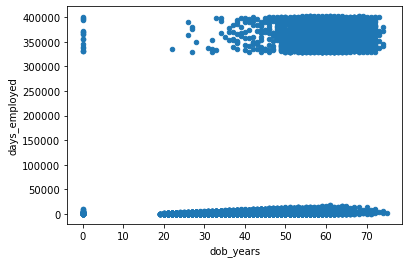

In [21]:
my_plot = df.plot("dob_years", "days_employed", kind="scatter")
plt.show()

-los valores mayores de 300000 no son probables, estos se cambiaran por la media de los valores menores a 5000

In [22]:
print(df['days_employed'].max())
print(df['days_employed'].median())

401755.40047533
2194.220566878695


In [23]:
days_employed_greater = df[df['days_employed'] <= 50000]
days_employed_avg = days_employed_greater['days_employed'].mean()
days_employed_med = days_employed_greater['days_employed'].median()
print(days_employed_greater['days_employed'].max())
print(days_employed_greater['days_employed'].min())
print(days_employed_avg)
print(days_employed_med)

18388.949900568383
24.14163324048118
2353.015931998879
1630.0193809778218


In [24]:
#sustituimos los valores mayores a 30000 por la media de los valores debajo de 5000
df.loc[df['days_employed'] > 300000, 'days_employed'] = days_employed_avg

In [25]:
df['days_employed']

0        8437.673028
1        4024.803754
2        5623.422610
3        4124.747207
4        2353.015932
            ...     
21520    4529.316663
21521    2353.015932
21522    2113.346888
21523    3112.481705
21524    1984.507589
Name: days_employed, Length: 21525, dtype: float64

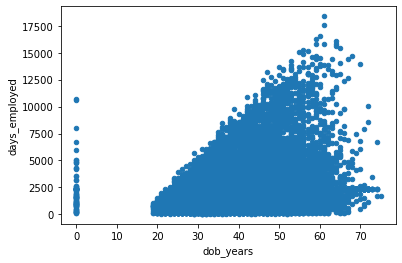

24.14163324048118
18388.949900568383
2194.220566878695
2353.0159319989175


In [26]:
my_plot = df.plot("dob_years", "days_employed", kind="scatter")
plt.show()

print(df['days_employed'].min())
print(df['days_employed'].max())
print(df['days_employed'].median())
print(df['days_employed'].mean())

- Podemos ver una distribución mas constante, ya que entre mas años tenga el cliente es mas su experiencia trabajando

0
75
42.0
43.29337979094077


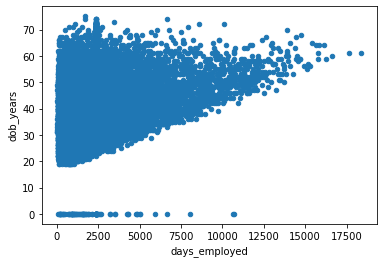

In [27]:
# Revisa `dob_years` en busca de valores sospechosos y cuenta el porcentaje
my_plot = df.plot("days_employed", "dob_years", kind="scatter")

print(df['dob_years'].min())
print(df['dob_years'].max())
print(df['dob_years'].median())
print(df['dob_years'].mean())

- no puede haber trabajadores menores de 18 años
- estos se cambiaran por el promedio, descartando los valores menores de 18 años

In [28]:
dob_years_minors = df[df['dob_years'] > 17]
dob_years_minors

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,2353.015932,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21521,0,2353.015932,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car


In [29]:
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,2353.015932,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21521,0,2353.015932,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car


In [30]:
dob_years_avg = dob_years_minors['dob_years'].mean()
round(dob_years_avg)

43

In [31]:
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,2353.015932,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21521,0,2353.015932,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car


In [32]:
# Resuelve los problemas en la columna `dob_years`, si existen
#sustituimos los valores mayores a 20 por la media de los valores entre 20 y 75
df.loc[df['dob_years'] < 18, 'dob_years'] = dob_years_avg

19.0
75.0
43.0
43.497479462285334


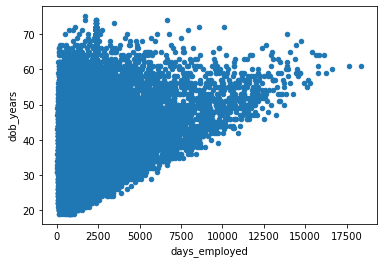

In [33]:
# Comprueba el resultado - asegúrate de que esté arreglado
my_plot = df.plot("days_employed", "dob_years", kind="scatter")

print(df['dob_years'].min())
print(df['dob_years'].max())
print(df['dob_years'].median())
print(df['dob_years'].mean())
df['dob_years'] = df['dob_years'].astype('int64')

In [34]:
# Veamos los valores de la columna family_status
print(df['family_status'].value_counts())
df.info()

married              12380
civil partnership     4177
unmarried             2813
divorced              1195
widow / widower        960
Name: family_status, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


- Estos valores los sumaremos y sustituiremos en unmarried

In [35]:
# Aborda los valores problemáticos en `family_status`, si existen
print(df['family_status'].value_counts())
print()
df.info()
print()


married              12380
civil partnership     4177
unmarried             2813
divorced              1195
widow / widower        960
Name: family_status, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB



In [36]:
# Comprueba el resultado - asegúrate de que esté arreglado
print(df['family_status'].value_counts())

married              12380
civil partnership     4177
unmarried             2813
divorced              1195
widow / widower        960
Name: family_status, dtype: int64


In [37]:
# Veamos los valores en la columna gender
print(df['gender'].value_counts())

F      14236
M       7288
XNA        1
Name: gender, dtype: int64


- El valor de XNA no es valido, remplazaran en M 

In [38]:
# Aborda los valores problemáticos, si existen
df.loc[df['gender'] == 'XNA', 'gender'] = 'M'

In [39]:
# Comprueba el resultado - asegúrate de que esté arreglado
print(df['gender'].value_counts())

F    14236
M     7289
Name: gender, dtype: int64


In [40]:
# Veamos los valores en la columna income_type
print(df['income_type'].value_counts())

employee                       11119
business                        5085
retiree                         3856
civil servant                   1459
unemployed                         2
entrepreneur                       2
student                            1
paternity / maternity leave        1
Name: income_type, dtype: int64


In [41]:
# Comprueba el resultado - asegúrate de que esté arreglado
print(df['income_type'].value_counts())

employee                       11119
business                        5085
retiree                         3856
civil servant                   1459
unemployed                         2
entrepreneur                       2
student                            1
paternity / maternity leave        1
Name: income_type, dtype: int64


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [43]:
# Comprobar los duplicados
df.duplicated().sum()

71

In [44]:
# Aborda los duplicados, si existen
df = df.drop_duplicates().reset_index(drop = True)

In [45]:
# Última comprobación para ver si tenemos duplicados
df.duplicated().sum()

0

In [46]:
# Comprueba el tamaño del conjunto de datos que tienes ahora, después de haber ejecutado estas primeras manipulaciones
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21454 entries, 0 to 21453
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21454 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21454 non-null  int64  
 3   education         21454 non-null  object 
 4   education_id      21454 non-null  int64  
 5   family_status     21454 non-null  object 
 6   family_status_id  21454 non-null  int64  
 7   gender            21454 non-null  object 
 8   income_type       21454 non-null  object 
 9   debt              21454 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21454 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


- En el nuevo conjunto de datos se han eliminado datos duplicados y se ha reducido casi en 1% del valor original, se han areglado las columnas mal escritas y con valores negativos 

# Trabajar con valores ausentes

In [47]:
# Encuentra los diccionarios
import numpy as np

### Restaurar valores ausentes en `total_income`

In [48]:
# Vamos a escribir una función que calcule la categoría de edad

def dob_years_group(dob_years):
    if dob_years < 30 or pd.isna(dob_years):
        return '20-29'
    elif 30 <= dob_years < 40:
        return '30-39'
    elif 40 <= dob_years < 50:
        return '40-49'
    elif 50 <= dob_years < 60:
        return '50-59'
    elif 60 <= dob_years < 70:
        return '60-69'
    return '70+'

#probando la funciòn 
row_values = ['60-69']  
row_columns = ['dob_years']
row = pd.Series(data=row_values, index=row_columns)

In [49]:
# Crear una nueva columna basada en la función
df['years_goup'] = df['dob_years'].apply(dob_years_group)

In [50]:
# Comprobar cómo los valores en la nueva columna
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_goup
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,40-49
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,30-39
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,30-39
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,30-39
4,0,2353.015932,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,50-59
5,0,926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house,20-29
6,0,2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions,40-49
7,0,152.779569,50,secondary education,1,married,0,M,employee,0,21731.829,education,50-59
8,2,6929.865299,35,bachelor's degree,0,civil partnership,1,F,employee,0,15337.093,having a wedding,30-39
9,0,2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family,40-49


In [51]:
# Crea una tabla sin valores ausentes y muestra algunas de sus filas para asegurarte de que se ve bien
df_without_nan = df.dropna()
df_without_nan.info()
df_without_nan

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19351 entries, 0 to 21453
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          19351 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         19351 non-null  int64  
 3   education         19351 non-null  object 
 4   education_id      19351 non-null  int64  
 5   family_status     19351 non-null  object 
 6   family_status_id  19351 non-null  int64  
 7   gender            19351 non-null  object 
 8   income_type       19351 non-null  object 
 9   debt              19351 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           19351 non-null  object 
 12  years_goup        19351 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.1+ MB


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_goup
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,40-49
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,30-39
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,30-39
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,30-39
4,0,2353.015932,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,50-59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21449,1,4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,40-49
21450,0,2353.015932,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car,60-69
21451,1,2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,30-39
21452,3,3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,30-39


3306.762
362496.645
23202.87
26787.56835465871


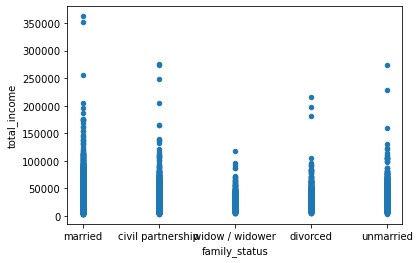

In [52]:
# Examina los valores medios de los ingresos en función del estado civil
my_plot = df_without_nan.plot("family_status", "total_income", kind="scatter")

print(df_without_nan['total_income'].min())
print(df_without_nan['total_income'].max())
print(df_without_nan['total_income'].median())
print(df_without_nan['total_income'].mean())

3306.762
362496.645
23202.87
26787.56835465871


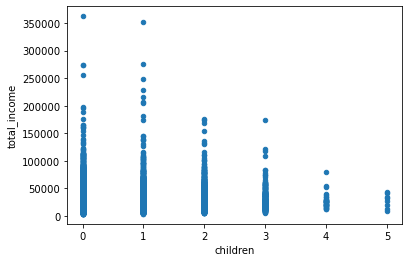

In [53]:
# Examina los valores medios de los ingresos en función del la Hijos

my_plot = df_without_nan.plot("children", "total_income", kind="scatter")

print(df_without_nan['total_income'].min())
print(df_without_nan['total_income'].max())
print(df_without_nan['total_income'].median())
print(df_without_nan['total_income'].mean())

3306.762
362496.645
23202.87
26787.56835465871


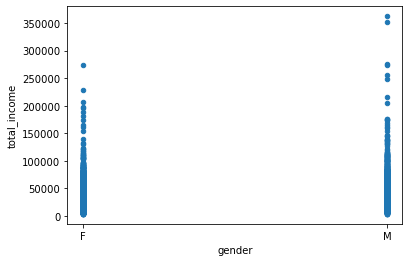

In [54]:
# Examina los valores medios de los ingresos en función del genero

my_plot = df_without_nan.plot("gender", "total_income", kind="scatter")

print(df_without_nan['total_income'].min())
print(df_without_nan['total_income'].max())
print(df_without_nan['total_income'].median())
print(df_without_nan['total_income'].mean())

3306.762
362496.645
23202.87
26787.56835465871


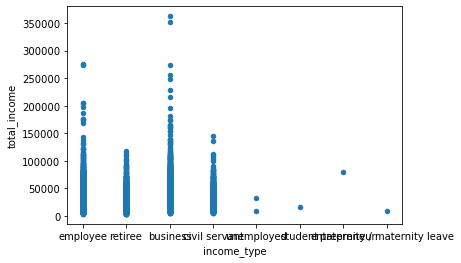

In [55]:
# Examina los valores medios de los ingresos en función del tipo de empleo 

my_plot = df_without_nan.plot("income_type", "total_income", kind="scatter")

print(df_without_nan['total_income'].min())
print(df_without_nan['total_income'].max())
print(df_without_nan['total_income'].median())
print(df_without_nan['total_income'].mean())

3306.762
362496.645
23202.87
26787.56835465871


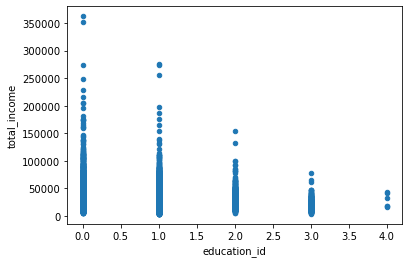

In [56]:
# Examina los valores medios de los ingresos en función del la education
my_plot = df_without_nan.plot("education_id", "total_income", kind="scatter")

print(df_without_nan['total_income'].min())
print(df_without_nan['total_income'].max())
print(df_without_nan['total_income'].median())
print(df_without_nan['total_income'].mean())

Se aplicar sustituiran los valores ausentes por el promedio de cada nivel educativo

In [57]:
#creamos una tabla dinamica donde los indices serian el education_id
income_education = df_without_nan.pivot_table(index='education_id', values='total_income', aggfunc='mean')
income_education

,total_income
education_id,
0,33142.802434
1,24594.503037
2,29045.443644
3,21144.882211
4,27960.024667


In [58]:
#  Escribe una función que usaremos para completar los valores ausentes

def total_income_education(row):
    education_id = row['education_id']
    total_income = row['total_income']
    if pd.isna(total_income):
        return income_education['total_income'][education_id]
    return total_income

In [59]:
#comprobar la funcioncion 
row_values = [np.nan, 3]  
row_columns = ['total_income', 'education_id']
row = pd.Series(data=row_values, index=row_columns)
total_income_education(row)
# Reemplazar los valores ausentes si hay algún error
df['total_income'] = df.apply(total_income_education, axis=1)

In [60]:
# Comprobar el número de entradas en las columnas
df.info()
df.head(13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21454 entries, 0 to 21453
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21454 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21454 non-null  int64  
 3   education         21454 non-null  object 
 4   education_id      21454 non-null  int64  
 5   family_status     21454 non-null  object 
 6   family_status_id  21454 non-null  int64  
 7   gender            21454 non-null  object 
 8   income_type       21454 non-null  object 
 9   debt              21454 non-null  int64  
 10  total_income      21454 non-null  float64
 11  purpose           21454 non-null  object 
 12  years_goup        21454 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.1+ MB


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_goup
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102000,purchase of the house,40-49
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802000,car purchase,30-39
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752000,purchase of the house,30-39
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568000,supplementary education,30-39
4,0,2353.015932,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572000,to have a wedding,50-59
5,0,926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170000,purchase of the house,20-29
6,0,2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156000,housing transactions,40-49
7,0,152.779569,50,secondary education,1,married,0,M,employee,0,21731.829000,education,50-59
8,2,6929.865299,35,bachelor's degree,0,civil partnership,1,F,employee,0,15337.093000,having a wedding,30-39
9,0,2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150000,purchase of the house for my family,40-49


24.14163324048118
18388.949900568383
2194.220566878695
2353.0159319989175


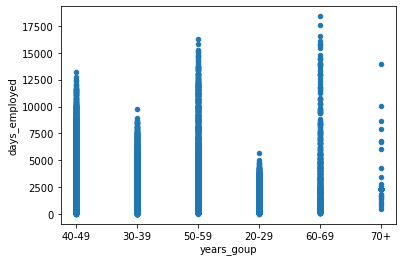

In [61]:
# Distribución de las medias de `days_employed` en función de los parámetros identificados
my_plot = df_without_nan.plot("years_goup", "days_employed", kind="scatter")

print(df_without_nan['days_employed'].min())
print(df_without_nan['days_employed'].max())
print(df_without_nan['days_employed'].median())
print(df_without_nan['days_employed'].mean())

In [62]:
days_employed_group = df_without_nan.pivot_table(index='years_goup', values='days_employed', aggfunc='mean')
days_employed_group

,days_employed
years_goup,
20-29,1212.702751
30-39,2028.329275
40-49,2714.026894
50-59,2935.124727
60-69,2687.136194
70+,2587.240056


In [63]:
#  Escribe una función que usaremos para completar los valores ausentes

def years_goup_employed(row):
    years_goup = row['years_goup']
    days_employed = row['days_employed']
    if pd.isna(days_employed):
        return days_employed_group['days_employed'][years_goup]
    return days_employed

In [64]:
#comprobar la funcioncion 
row_values = [np.nan, '60-69']  
row_columns = ['days_employed', 'years_goup']
row = pd.Series(data=row_values, index=row_columns)
years_goup_employed(row)

2687.136193755712

In [65]:
# Reemplazar los valores ausentes si hay algún error
df['days_employed'] = df.apply(years_goup_employed, axis=1)

In [66]:
# Comprobar el número de entradas en las columnas
df.info()
df.head(13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21454 entries, 0 to 21453
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21454 non-null  int64  
 1   days_employed     21454 non-null  float64
 2   dob_years         21454 non-null  int64  
 3   education         21454 non-null  object 
 4   education_id      21454 non-null  int64  
 5   family_status     21454 non-null  object 
 6   family_status_id  21454 non-null  int64  
 7   gender            21454 non-null  object 
 8   income_type       21454 non-null  object 
 9   debt              21454 non-null  int64  
 10  total_income      21454 non-null  float64
 11  purpose           21454 non-null  object 
 12  years_goup        21454 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.1+ MB


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_goup
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102000,purchase of the house,40-49
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802000,car purchase,30-39
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752000,purchase of the house,30-39
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568000,supplementary education,30-39
4,0,2353.015932,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572000,to have a wedding,50-59
5,0,926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170000,purchase of the house,20-29
6,0,2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156000,housing transactions,40-49
7,0,152.779569,50,secondary education,1,married,0,M,employee,0,21731.829000,education,50-59
8,2,6929.865299,35,bachelor's degree,0,civil partnership,1,F,employee,0,15337.093000,having a wedding,30-39
9,0,2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150000,purchase of the house for my family,40-49


## Clasificación de datos


In [67]:
# Comprobar los valores únicos
print(df['purpose'].unique())
print(df['purpose'].value_counts())

['purchase of the house' 'car purchase' 'supplementary education'
 'to have a wedding' 'housing transactions' 'education' 'having a wedding'
 'purchase of the house for my family' 'buy real estate'
 'buy commercial real estate' 'buy residential real estate'
 'construction of own property' 'property' 'building a property'
 'buying a second-hand car' 'buying my own car'
 'transactions with commercial real estate' 'building a real estate'
 'housing' 'transactions with my real estate' 'cars' 'to become educated'
 'second-hand car purchase' 'getting an education' 'car'
 'wedding ceremony' 'to get a supplementary education'
 'purchase of my own house' 'real estate transactions'
 'getting higher education' 'to own a car' 'purchase of a car'
 'profile education' 'university education'
 'buying property for renting out' 'to buy a car' 'housing renovation'
 'going to university']
wedding ceremony                            791
having a wedding                            768
to have a wedding    

- Se puede observar que el propocito del prestamos es el mismo, pero con diferente redacciòn 

In [68]:
# Escribamos una función para clasificar los datos en función de temas comunes

def pupose_class(row):
    
    purpose = row['purpose']
    
    car = purpose.find('car')
    if car != -1:
        return 'car'
    
    education = purpose.find('education')
    if education != -1:
        return 'education'
    
    education = purpose.find('university')
    if education != -1:
        return 'education'
    
    education = purpose.find('educated')
    if education != -1:
        return 'education'
    
    house = purpose.find('house')
    if house != -1:
        return 'house'
    
    wedding = purpose.find('wedding')
    if wedding != -1:
        return 'wedding'

    house = purpose.find('real estate')
    if house != -1:
        return 'house'
    
    house  = purpose.find('housing')
    if house  != -1:
        return 'house'
    
    house = purpose.find('property')
    if house != -1:
        return 'house'
    return purpose
    
row_values = ['buying a second-hand car']  
row_columns = ['purpose']
row = pd.Series(data=row_values, index=row_columns)
# Crea una columna con las categorías y cuenta los valores en ellas
df['purpose'] = df.apply(pupose_class, axis=1)

In [69]:
print(pupose_class(row))

car


In [70]:
# Crea una columna con las categorías y cuenta los valores en ellas
print(df['purpose'].unique())
print(df['purpose'].value_counts())

['house' 'car' 'education' 'wedding']
house        10811
car           4306
education     4013
wedding       2324
Name: purpose, dtype: int64


In [71]:
# Revisar todos los datos numéricos en la columna seleccionada para la clasificación
print(df['total_income'].value_counts())

24594.503037    1479
33142.802434     534
29045.443644      69
21144.882211      21
31791.384000       2
                ... 
27020.895000       1
23686.835000       1
9606.294000        1
28156.762000       1
13127.587000       1
Name: total_income, Length: 19352, dtype: int64


3306.762
362496.645
23202.87
26787.56835465871


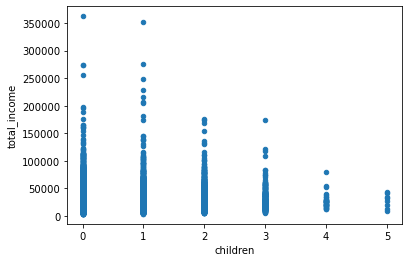

In [72]:
# Obtener estadísticas resumidas para la columna
my_plot = df_without_nan.plot("children", "total_income", kind="scatter")

print(df_without_nan['total_income'].min())
print(df_without_nan['total_income'].max())
print(df_without_nan['total_income'].median())
print(df_without_nan['total_income'].mean())

- Se agruparan en tres grupos: baja, media y alta para poder visualizar mejor con otros datos

In [73]:
df_without_nan['total_income'].describe()

count     19351.000000
mean      26787.568355
std       16475.450632
min        3306.762000
25%       16488.504500
50%       23202.870000
75%       32549.611000
max      362496.645000
Name: total_income, dtype: float64

In [74]:
# Crear una función para clasificar en diferentes grupos numéricos basándose en rangos

def total_income_group(total_income):
    if total_income < 16488.504500:
        return 'baja'
    elif 16488.504500 <= total_income < 23202.870000:
        return 'media'
    elif 23202.870000 <= total_income <= df_without_nan['total_income'].max():
        return 'alta'
    return 'alta'

#probando la funciòn 
row_values = ['alta']  
row_columns = ['total_income']
row = pd.Series(data=row_values, index=row_columns)

# Crear una nueva columna basada en la función
df['income_group'] = df['total_income'].apply(total_income_group)
df['income_group'].value_counts()

alta     11758
media     4858
baja      4838
Name: income_group, dtype: int64

Los datos se seleccionaron dependiendo el porcentaje de la población 

## Comprobación de las hipótesis

In [75]:
# Comprueba los datos sobre los hijos y los pagos puntuales
children_grouped = df.groupby('children').agg( {'debt': ['count', 'sum']} )
# Calcular la tasa de incumplimiento en función del número de hijos
met_count = children_grouped['debt']['count']
met_sum = children_grouped['debt']['sum']
children_grouped['conversion'] = (met_sum / met_count) * 100
children_grouped

debt       conversion
          count   sum           
children                        
0         14091  1063   7.543822
1          4855   445   9.165808
2          2128   202   9.492481
3           330    27   8.181818
4            41     4   9.756098
5             9     0   0.000000

- Las tasas de endeudamiento son muy bajas

In [76]:
# Comprueba los datos del estado familiar y los pagos a tiempo
family_status_grouped = df.groupby('family_status_id').agg( {'debt': ['count', 'sum']} )
# Calcular la tasa de incumplimiento basada en el estado familiar
met_count = family_status_grouped['debt']['count']
met_sum = family_status_grouped['debt']['sum']
family_status_grouped['conversion'] = (met_sum / met_count) * 100
family_status_grouped

debt      conversion
                  count  sum           
family_status_id                       
0                 12339  931   7.545182
1                  4151  388   9.347145
2                   959   63   6.569343
3                  1195   85   7.112971
4                  2810  274   9.750890

- Las tasas de endeudamiento son muy bajas y la diferencia entre cada una es minina 

In [77]:
# Comprueba los datos del nivel de ingresos y los pagos a tiempo
income_grouped = df.groupby('income_group').agg( {'debt': ['count', 'sum']} )
# Calcular la tasa de incumplimiento basada en el nivel de ingresos
met_count = income_grouped['debt']['count']
met_sum = income_grouped['debt']['sum']
income_grouped['conversion'] = (met_sum / met_count) * 100
income_grouped

debt      conversion
              count  sum           
income_group                       
alta          11758  934   7.943528
baja           4838  383   7.916494
media          4858  424   8.727872

- Las tasas de endeudamiento son muy bajas y la diferencia entre cada una es minina 

In [78]:
# Consulta los porcentajes de tasa de incumplimiento para cada propósito del crédito y analízalos
purpose_grouped = df.groupby('purpose').agg( {'debt': ['count', 'sum']} )
# Calcular la tasa de incumplimiento basada en el propósito del crédito
met_count = purpose_grouped['debt']['count']
met_sum = purpose_grouped['debt']['sum']
purpose_grouped['conversion'] = (met_sum / met_count) * 100
purpose_grouped

debt      conversion
           count  sum           
purpose                         
car         4306  403   9.359034
education   4013  370   9.220035
house      10811  782   7.233373
wedding     2324  186   8.003442

- Las tasas de endeudamiento son muy bajas y la diferencia entre cada una es minina 